In [12]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import json

In [3]:
import os

In [5]:
# Directory where your JSON files are located
directory = 'data/Hopper-v4/'

# Initialize a list to store dictionaries
json_data = []

merged_data = {}

file_path = 'history.json'
with open(directory+file_path, 'r') as file:
    # Read JSON content
    json_content = json.load(file)
    # Update merged_data with content from each file

merged_data = json_content

# Loop through the directory
# for filename in os.listdir(directory):
#     if filename.endswith('.json'):
#         file_path = os.path.join(directory, filename)
#         with open(file_path, 'r') as file:
#             # Read JSON content
#             json_content = json.load(file)
#             # Update merged_data with content from each file
#             merged_data.update(json_content)

In [6]:
# Now merged_data contains all the data from JSON files merged into a single dictionary
print(merged_data)

[[[2.85, 2.83, 2.77, 2.73, 2.73], [0.23, 0.18, 0.12, 0.14, 0.13]], [[2.57, 2.58, 2.51, 2.48, 2.47], [0.19, 0.14, 0.1, 0.13, 0.11]], [[2.4, 2.41, 2.32, 2.28, 2.26], [0.17, 0.14, 0.09, 0.11, 0.1]], [[2.26, 2.26, 2.15, 2.1, 2.08], [0.16, 0.13, 0.09, 0.11, 0.09]], [[2.12, 2.12, 2.0, 1.95, 1.92], [0.15, 0.13, 0.08, 0.11, 0.09]], [[2.0, 1.99, 1.87, 1.81, 1.78], [0.14, 0.12, 0.08, 0.09, 0.08]], [[1.89, 1.88, 1.75, 1.69, 1.66], [0.14, 0.12, 0.08, 0.09, 0.08]], [[1.79, 1.77, 1.64, 1.58, 1.56], [0.13, 0.12, 0.08, 0.09, 0.09]], [[1.7, 1.68, 1.54, 1.49, 1.46], [0.13, 0.11, 0.08, 0.09, 0.09]], [[1.61, 1.6, 1.46, 1.4, 1.38], [0.12, 0.11, 0.09, 0.09, 0.08]], [[1.54, 1.52, 1.38, 1.32, 1.3], [0.14, 0.1, 0.08, 0.09, 0.09]], [[1.47, 1.45, 1.31, 1.25, 1.23], [0.14, 0.12, 0.09, 0.09, 0.09]], [[1.4, 1.39, 1.24, 1.19, 1.17], [0.12, 0.13, 0.09, 0.09, 0.08]], [[1.34, 1.32, 1.19, 1.13, 1.12], [0.14, 0.1, 0.07, 0.09, 0.08]], [[1.28, 1.27, 1.13, 1.07, 1.07], [0.12, 0.1, 0.07, 0.08, 0.08]], [[1.22, 1.21, 1.07, 1.0

In [12]:
bla = np.array(merged_data)

In [13]:
bla.shape

(107, 2, 5)

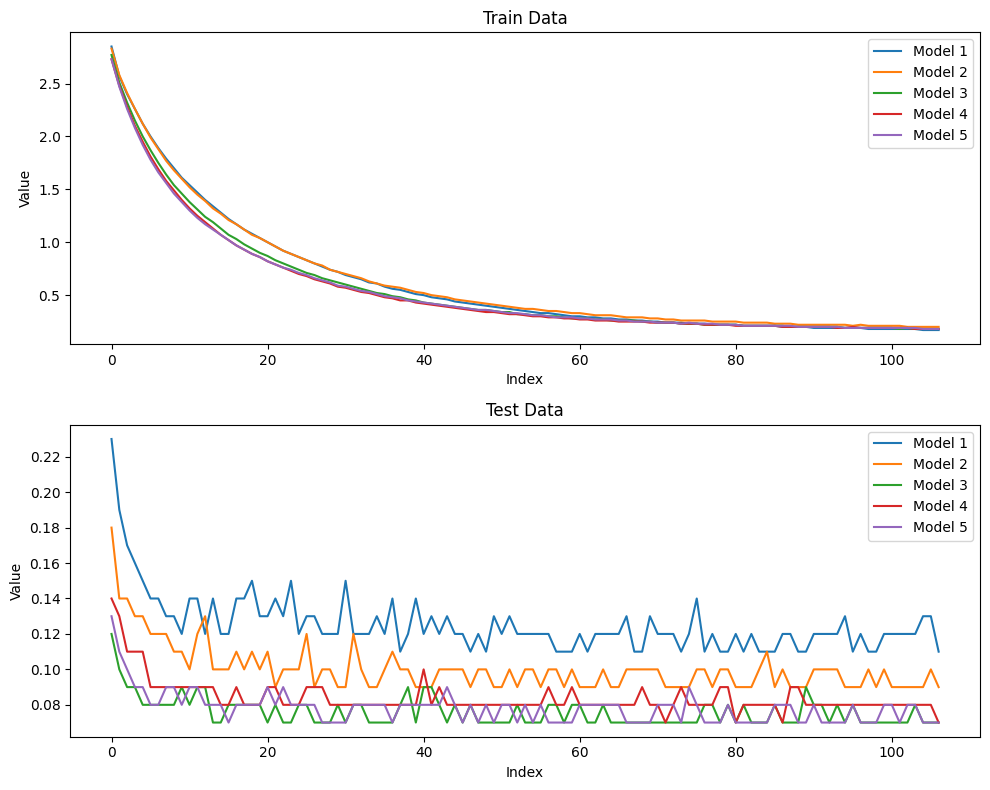

In [15]:
import matplotlib.pyplot as plt

# Assuming your numpy array is named 'data'
# data.shape = (107, 2, 5)

# Define the number of models
data = bla
num_models = data.shape[2]

# Set up subplots for train and test data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot train and test data for each model
for i in range(num_models):
    # Plot train data
    axes[0].plot(data[:, 0, i], label=f'Model {i+1}')
    axes[0].set_title('Train Data')
    axes[0].set_xlabel('Index')
    axes[0].set_ylabel('Value')

    # Plot test data
    axes[1].plot(data[:, 1, i], label=f'Model {i+1}')
    axes[1].set_title('Test Data')
    axes[1].set_xlabel('Index')
    axes[1].set_ylabel('Value')

# Add legends
axes[0].legend()
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [14]:
bla.max()

2.85

In [7]:
len(merged_data)

107

In [21]:
# Key - Timestep
# Performance / Reward
import matplotlib.pyplot as plt


In [22]:
sorted_data = dict(sorted(merged_data.items()))
timesteps = list(sorted_data.keys())
rewards = list(sorted_data.values())

In [23]:
max(timesteps)

'90851'

In [25]:
moving_avg_data = moving_average(data)

# Extract moving average timesteps and values
moving_avg_timesteps = list(moving_avg_data.keys())
moving_avg_values = list(moving_avg_data.values())


In [26]:
len(moving_avg_timesteps)

822

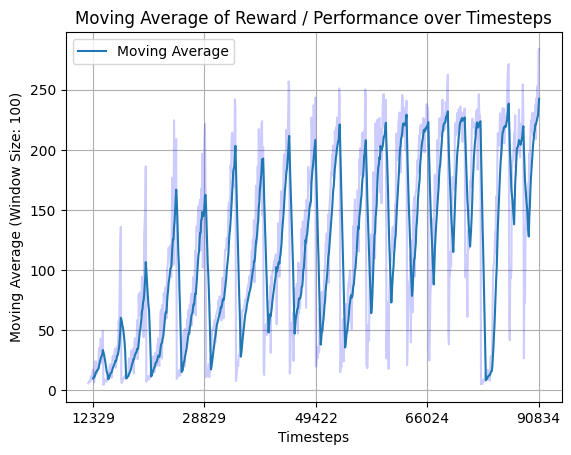

In [27]:
plt.plot(timesteps, rewards, color="blue", alpha = 0.2)
plt.plot(moving_avg_timesteps, moving_avg_values, linestyle='-', label='Moving Average')
plt.xlabel('Timesteps')
plt.ylabel('Moving Average (Window Size: 100)')
plt.title('Moving Average of Reward / Performance over Timesteps')
plt.grid(True)

# Set the x-axis to display only a subset of timestamps
num_timesteps = len(moving_avg_timesteps)
step = max(num_timesteps // 4, 1)  # Display 5 timestamps
plt.xticks(moving_avg_timesteps[::step])

plt.legend()
plt.show()

In [26]:
f = open(f"SAC_data/rewards_Hopper-v4.json", 'r')
data = json.loads(f.read())
f.close()

In [28]:
def moving_average(data):
    window_size = 100
    moving_averages = []
    for i in range(len(data) - window_size + 1):
        window_values = data[i : i + window_size]
        window_average = round(sum(window_values) / window_size, 2)
        moving_averages.append(window_average)
    return moving_averages


In [29]:
data_avg = moving_average(data)

In [32]:
len(data_avg)

4114

In [33]:
range(20, len(data_avg))

range(20, 4114)

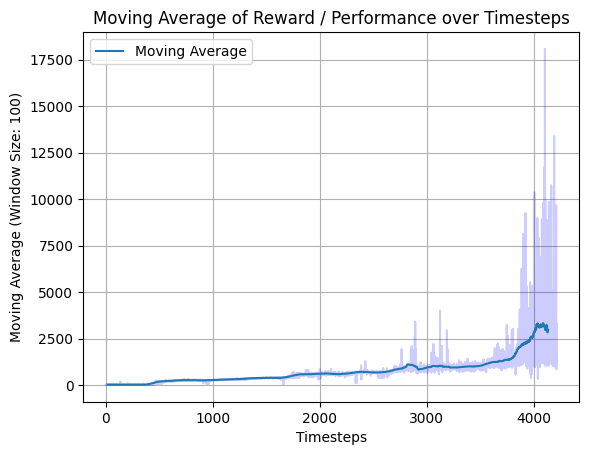

In [36]:
plt.plot(data, color="blue", alpha = 0.2)
plt.plot([i for i in range(20, len(data_avg)+20)], data_avg, linestyle='-', label='Moving Average')
plt.xlabel('Timesteps')
plt.ylabel('Moving Average (Window Size: 100)')
plt.title('Moving Average of Reward / Performance over Timesteps')
plt.grid(True)

# Set the x-axis to display only a subset of timestamps
# num_timesteps = len(moving_avg_timesteps)
# step = max(num_timesteps // 4, 1)  # Display 5 timestamps
# plt.xticks(moving_avg_timesteps[::step])

plt.legend()
plt.show()